In [1]:
# Third-party
import astropy.coordinates as coord
from astropy.io import ascii
from astropy.table import Table, join
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
from pyia import GaiaData

import gala.dynamics as gd
import gala.potential as gp
from gala.mpl_style import center_deemph, center_emph

In [2]:
galcen_frame = coord.Galactocentric(galcen_distance=8.1*u.kpc)
mw = gp.MilkyWayPotential()

In [3]:
glob = Table.read('/Users/adrian/data/Misc/Harris-globclust.fits')
gals = ascii.read('/Users/adrian/data/Misc/NearbyGalaxies.dat')

glob_c = coord.SkyCoord(ra=glob['ra'], dec=glob['dec'], unit=(u.hourangle, u.degree))
gals_c = coord.SkyCoord(ra=gals['RA'], dec=gals['Dec'], unit=(u.hourangle, u.degree))
known_c = coord.concatenate((glob_c, gals_c))
known_names = np.concatenate((np.array(glob['name']), np.array(gals['name'])))

In [4]:
t = Table.read('/Users/adrian/data/LAMOST/dr4_vickers_wang.fits.gz')

(5, 0)

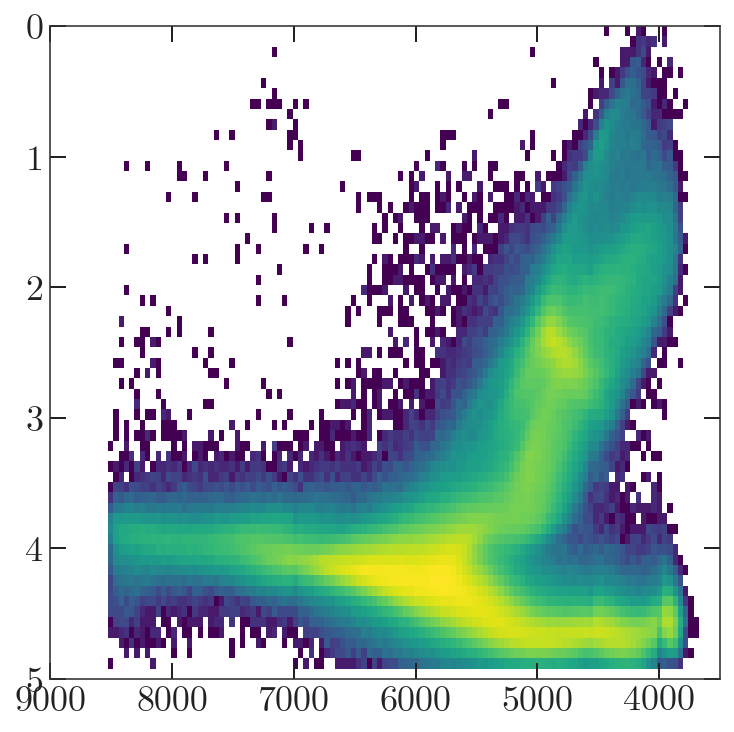

In [5]:
fig, ax = plt.subplots()
ax.hist2d(t['teff'], t['logg'], 
          bins=(np.linspace(3500, 9000, 128),
                np.linspace(0, 5, 64)),
          norm=mpl.colors.LogNorm())
ax.set_xlim(9000, 3500)
ax.set_ylim(5, 0)

In [6]:
# giants_mask = ((t['teff'] > 3500) & (t['teff'] < 5500) & 
#                (t['logg'] > 0) & (t['logg'] < 3.5) &
#                (t['d(kpc)'] > 2.) & (t['rv_err'] < 5.) & 
#                (t['feh'] > -2.5) & (t['feh'] < -1.) &
#                (np.abs(t['z_avg']) > 1.))

giants_mask = ((t['teff'] > 4500) & (t['teff'] < 7500) & 
               (t['logg'] > 3.9) & (t['rv_err'] < 5.) & 
               (t['d(kpc)'] > 0))

giants_mask.sum()

634948

In [7]:
giants = t[giants_mask]

(5, 0)

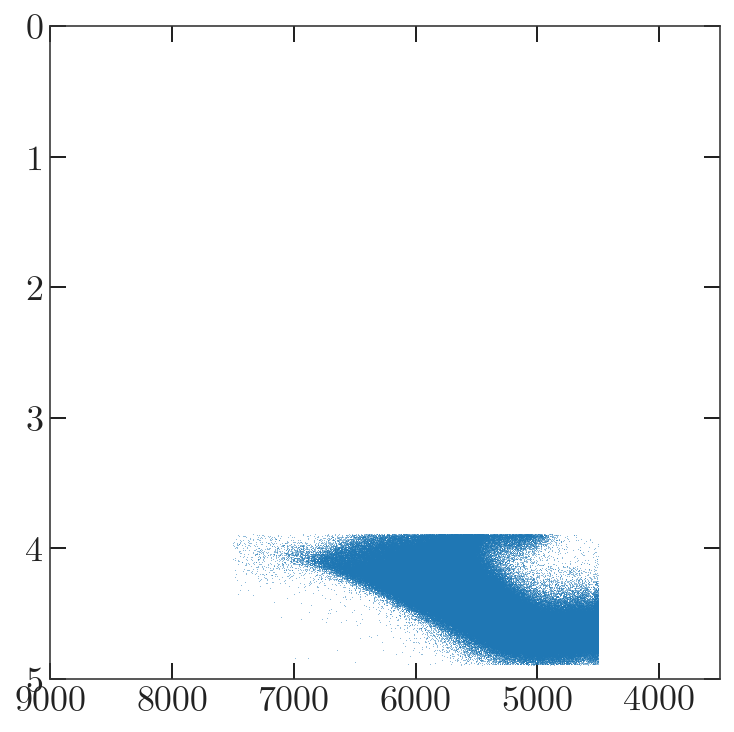

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(giants['teff'], giants['logg'],
        marker=',', ls='none', alpha=0.5)
ax.set_xlim(9000, 3500)
ax.set_ylim(5, 0)

In [9]:
c = coord.SkyCoord(ra=giants['ra_gaia'],
                   dec=giants['dec_gaia'],
                   distance=giants['d(kpc)']*u.kpc,
                   pm_ra_cosdec=giants['pmra'],
                   pm_dec=giants['pmde'],
                   radial_velocity=giants['rv_fix']*u.km/u.s)

_c = coord.SkyCoord(ra=giants['ra_gaia'],
                    dec=giants['dec_gaia'])

In [10]:
mean_idx, mean_sep, _ = _c.match_to_catalog_sky(known_c)
known_mask = mean_sep > 2*u.deg

In [11]:
galcen = c.transform_to(galcen_frame)

_r = np.sqrt(np.sum(galcen.data.xyz**2, axis=0))
mask = _r > 1. * u.kpc
w0 = gd.PhaseSpacePosition(galcen.data)[mask]
feh = giants['feh'][mask]

In [12]:
L = w0.angular_momentum()
Lxy = np.sqrt(L[0]**2 + L[1]**2)
Lz = L[2]

E = w0.energy(gp.Hamiltonian(mw))

In [21]:
Lz_lim = (-2000, 2000)
Lxy_lim = (0, 50)
E_lim = (-0.18, 0)

Text(0,0.5,'$L_{xy}$')

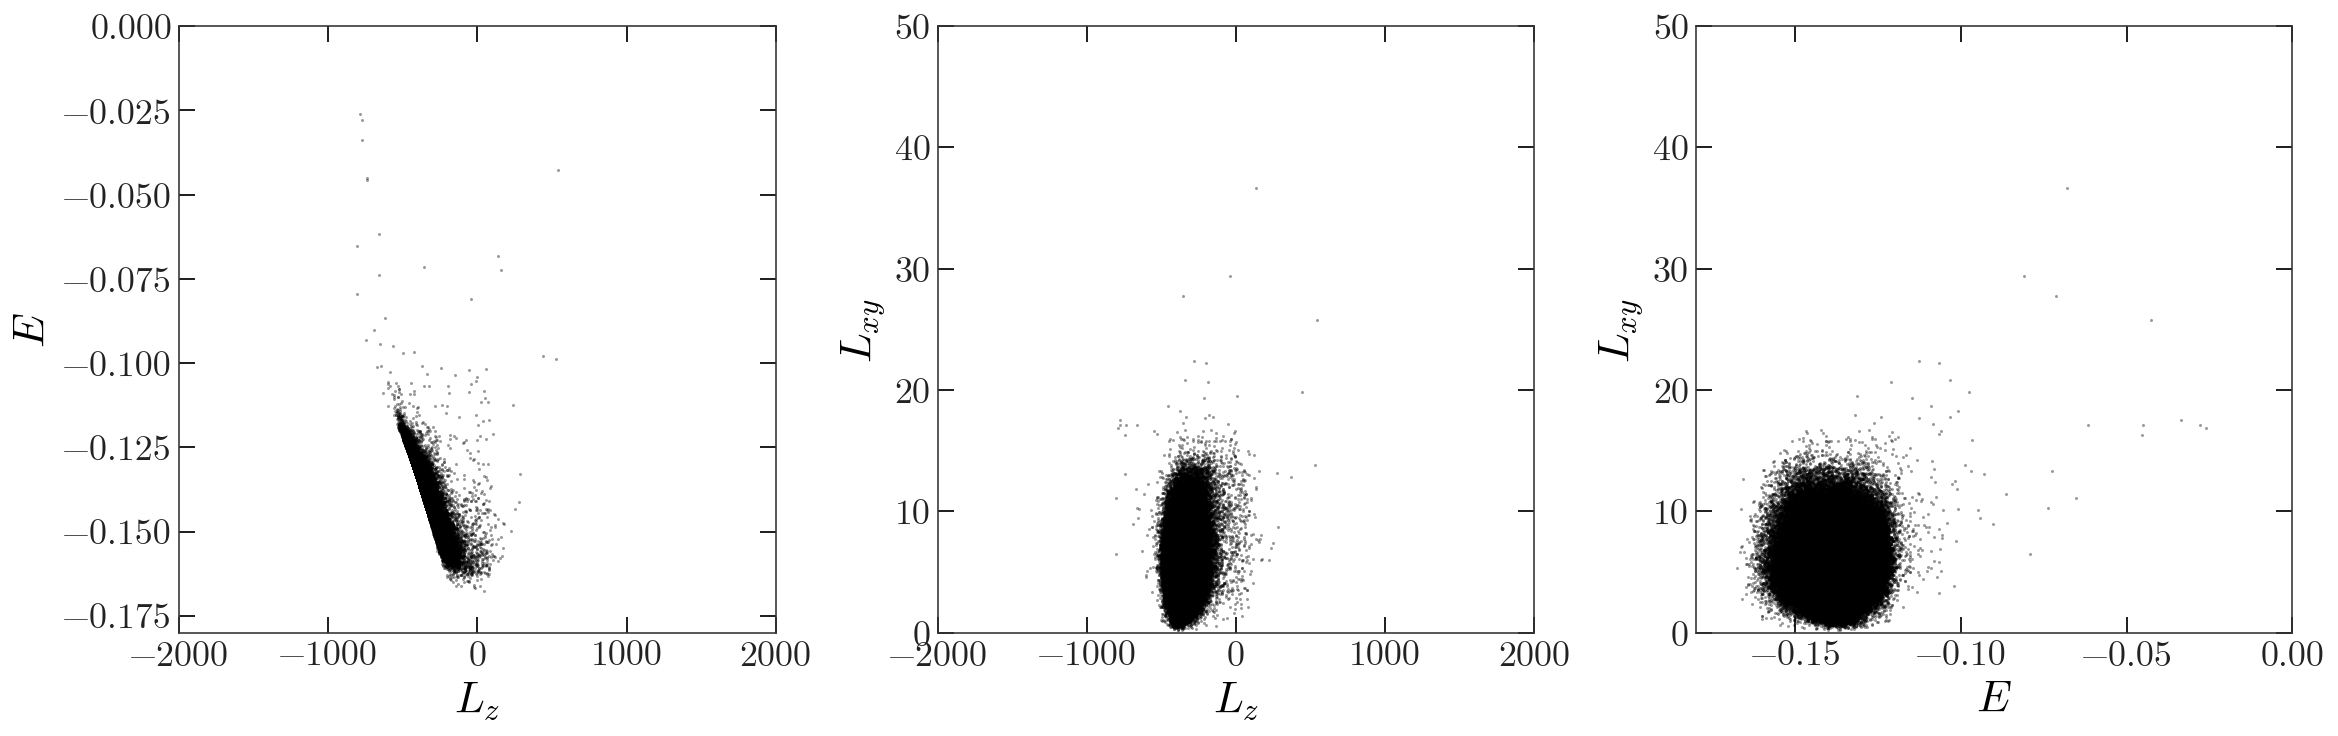

In [22]:
style = dict(marker='o', ls='none', 
             alpha=0.4, 
             ms=1.5, color='k')

fig, axes = plt.subplots(1, 3, figsize=(16, 5),
                         constrained_layout=True)

ax = axes[0]
ax.plot(Lz, E, **style)
ax.set_xlim(Lz_lim)
ax.set_ylim(E_lim)
ax.set_xlabel('$L_z$')
ax.set_ylabel('$E$')

ax = axes[1]
ax.plot(Lz, np.sqrt(Lxy), **style)
ax.set_xlim(Lz_lim)
ax.set_ylim(Lxy_lim)
ax.set_xlabel('$L_z$')
ax.set_ylabel('$L_{xy}$')

ax = axes[2]
ax.plot(E, np.sqrt(Lxy), **style)
ax.set_xlim(E_lim)
ax.set_ylim(Lxy_lim)
ax.set_xlabel('$E$')
ax.set_ylabel('$L_{xy}$')

In [23]:
# style = dict(marker='o', 
#              alpha=0.4, s=2,
#              cmap='hesperia',
#              c=feh,
#              vmin=-2, vmax=-0.8)

# fig, axes = plt.subplots(1, 3, figsize=(16, 5),
#                          constrained_layout=True)

# ax = axes[0]
# ax.scatter(Lz, E, **style)
# ax.set_xlim(Lz_lim)
# ax.set_ylim(E_lim)
# ax.set_xlabel('$L_z$')
# ax.set_ylabel('$E$')

# ax = axes[1]
# ax.scatter(Lz, np.sqrt(Lxy), **style)
# ax.set_xlim(Lz_lim)
# ax.set_ylim(Lxy_lim)
# ax.set_xlabel('$L_z$')
# ax.set_ylabel('$L_{xy}$')

# ax = axes[2]
# ax.scatter(E, np.sqrt(Lxy), **style)
# ax.set_xlim(E_lim)
# ax.set_ylim(Lxy_lim)
# ax.set_xlabel('$E$')
# ax.set_ylabel('$L_{xy}$')